In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
yellowstone_df = pd.read_csv("YellowstoneSpecies.csv", usecols=["Category", "Order", "Family", "Common Names", "Observations" ])

In [5]:
yellowstone_df

,Category,Order,Family,Common Names,Observations
0,Mammal,Artiodactyla,Antilocapridae,"antelope, pronghorn",8.0
1,Mammal,Artiodactyla,Bovidae,"bison, buffalo",4.0
2,Mammal,Artiodactyla,Bovidae,"mountain goat, Mountain Goat, Rocky Mountain goat",1.0
3,Mammal,Artiodactyla,Bovidae,"bighorn sheep, Bighorn Sheep",26.0
4,Mammal,Artiodactyla,Cervidae,"Eurasian Elk, moose",18.0
...,...,...,...,...,...
4174,Chromista,Thalassiosirales,Stephanodiscaceae,NaN,NaN
4175,Bacteria,Nostocales,Nostocaceae,NaN,NaN
4176,Bacteria,Nostocales,Nostocaceae,NaN,NaN
4177,Bacteria,Nostocales,Nostocaceae,NaN,NaN


In [207]:
yellowstone_df["Category"] = yellowstone_df["Category"].replace(np.nan, "Unknown")
yellowstone_df["Order"] = yellowstone_df["Order"].replace(np.nan, "Unknown")
yellowstone_df["Family"] = yellowstone_df["Family"].replace(np.nan, "Unknown")
yellowstone_df["Common Names"] = yellowstone_df["Common Names"].replace(np.nan, "Unknown")
yellowstone_df["Observations"] = yellowstone_df["Observations"].replace(np.nan, 0.0)
yellowstone_df["Observations"] = yellowstone_df["Observations"].replace("0", 0.0)

In [208]:
yellowstone_df

,Category,Order,Family,Common Names,Observations
0,Mammal,Artiodactyla,Antilocapridae,"antelope, pronghorn",8.0
1,Mammal,Artiodactyla,Bovidae,"bison, buffalo",4.0
2,Mammal,Artiodactyla,Bovidae,"mountain goat, Mountain Goat, Rocky Mountain goat",1.0
3,Mammal,Artiodactyla,Bovidae,"bighorn sheep, Bighorn Sheep",26.0
4,Mammal,Artiodactyla,Cervidae,"Eurasian Elk, moose",18.0
...,...,...,...,...,...
4174,Chromista,Thalassiosirales,Stephanodiscaceae,Unknown,0.0
4175,Bacteria,Nostocales,Nostocaceae,Unknown,0.0
4176,Bacteria,Nostocales,Nostocaceae,Unknown,0.0
4177,Bacteria,Nostocales,Nostocaceae,Unknown,0.0


In [209]:
birds_df = pd.DataFrame(yellowstone_df.loc[(yellowstone_df["Category"] == 'Bird')])
                           

In [233]:
eastwestbirds_df = pd.DataFrame(birds_df[birds_df['Common Names'].str.contains("Eastern|Western|eastern|western")])

In [234]:
sortedbirds_df = pd.DataFrame(eastwestbirds_df.groupby(["Order","Family"])["Observations"].sum())

In [235]:
sortedbirds_df

Observations
Order            Family                     
Accipitriformes  Pandionidae            53.0
Charadriiformes  Scolopacidae            4.0
Passeriformes    Cardinalidae            1.0
                 Icteridae               1.0
                 Turdidae                7.0
                 Tyrannidae              3.0
Pelecaniformes   Ardeidae                0.0
Podicipediformes Podicipedidae           0.0
Strigiformes     Strigidae               0.0

In [238]:
sightedbirds_df = pd.DataFrame(sortedbirds_df[(sortedbirds_df["Observations"] != 0)])

<AxesSubplot:title={'center':'Total Observations for Eastern and Western Birds'}, ylabel='Order,Family'>

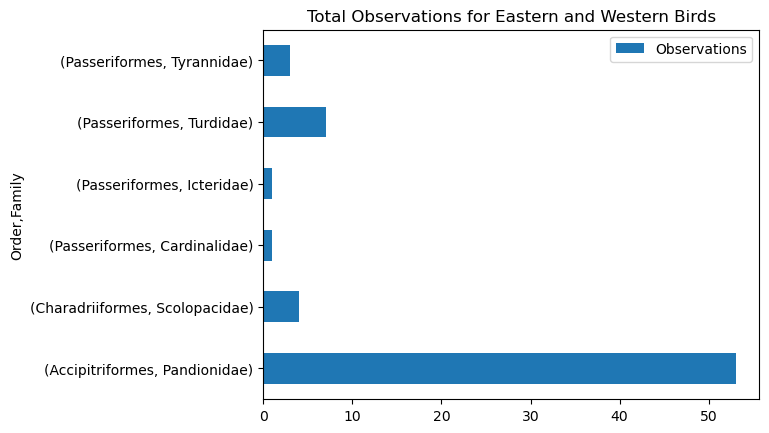

In [244]:
sightedbirds_df.plot(kind='barh', title='Total Observations for Eastern and Western Birds')